In [13]:
cd /Users/user/Desktop/UTokyo/2023S/2.Tue/5.知能社会情報学特別講義Ⅰ/Day5/SuperD_Class5

/Users/user/Desktop/UTokyo/2023S/2.Tue/5.知能社会情報学特別講義Ⅰ/Day5/SuperD_Class5


/Users/user/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [14]:
!pip install mojimoji

In [22]:
import pandas as pd
import mojimoji
from bs4 import BeautifulSoup 
from urllib import request
from urllib.error import HTTPError
import matplotlib.pyplot as plt
import numpy as np
import pickle
import datetime

# Change fontype of pyplot
import matplotlib.font_manager
#print([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = 'MS Gothic'

skip = 1

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [18]:
# url headers
url_head = "https://www5.cao.go.jp/keizai3/"
url_new = "https://www5.cao.go.jp/keizai3/watcher_index.html"
url_old = "https://www5.cao.go.jp/keizai3/kako_watcher.html"
# 
kigou2value = {"◎":5,"○":4,"□":3,"▲":2,"×":1}

In [19]:
def get_all_url(target):
    '''
    Description:webページ内の全urlを取得する関数
    入力：各調査が一覧になったページ
    出力：各調査のcsvがあるurl一覧
    '''
    data = request.urlopen(target).read()
    soup = BeautifulSoup(data, 'html.parser')
    tmp_links = soup.find_all("a")
    link = []
    for a in tmp_links:
        try:
            if "/menu.html" in a.attrs['href']:
                link.append(a.attrs['href'])
        except:
            pass
    return link

def extract_data(df_in):
    '''
    Description:各調査のcsvがあるurlからデータフレームを直接作る関数
    入力：各調査のcsvに直接アクセスできるurl
    出力：データフレーム
    '''  
    
    import mojimoji
    han_numbers = [str(_) for _ in range(10)]
    kigou_list = ["◎","○","□","▲","×"]

    
    place = 6
    sakiyuki = 0
    for l in range(len(df_in)):
        if ('景気の現状判断' in str(df_in.iloc[l,:])):
            place = l
            sakiyuki = 0
            break
            
        if ("景気の先行き判断" in str(df_in.iloc[l,:])):
            place = l
            sakiyuki = 1
            break
    
    col_names = df_in.iloc[place,:]
    use_col_names = dict()
    for l in range(len(col_names)):
        use_col_names.update({col_names[l]:l})
    
    out_data = []
    
    # Used to determine which regions
    line_header = ""

    # Loop through all records
    for i in range(len(df_in)):
        line = df_in.iloc[i,0]

        # Update line headers
        if line == line:
            line_rev = mojimoji.zen_to_han(line)
            for num in han_numbers:
                if num in line_rev:
                    line_header = line_rev

        line = df_in.iloc[i,2]
        if line == line:
            for kigou in kigou_list:
                if kigou in line:
                    if sakiyuki == 0:
                    
                        if "判断の理由" in use_col_names:

                            out_data.append([line_header,
                                             df_in.iloc[i,use_col_names["景気の現状判断"]],
                                             df_in.iloc[i,use_col_names["業種・職種"]],
                                             df_in.iloc[i,use_col_names["判断の理由"]],
                                             df_in.iloc[i,use_col_names["追加説明及び具体的状況の説明"]]])
                        else:
                            out_data.append([line_header,df_in.iloc[i,use_col_names["景気の現状判断"]],
                                             df_in.iloc[i,use_col_names["業種・職種"]],
                                             "",
                                             df_in.iloc[i,use_col_names["追加説明及び具体的状況の説明"]]])
                            
                    else:
                        if "判断の理由" in use_col_names:

                            out_data.append([line_header,
                                             df_in.iloc[i,use_col_names["景気の先行き判断"]],
                                             df_in.iloc[i,use_col_names["業種・職種"]],
                                             df_in.iloc[i,use_col_names["判断の理由"]],
                                             df_in.iloc[i,use_col_names["景気の先行きに対する判断理由"]]])
                        else:
                            out_data.append([line_header,df_in.iloc[i,use_col_names["景気の先行き判断"]],
                                             df_in.iloc[i,use_col_names["業種・職種"]],
                                             "",
                                             df_in.iloc[i,use_col_names["景気の先行きに対する判断理由"]]])     
                        
    df_out = pd.DataFrame(out_data)
    df_out.columns = ["region","symbol","industry","topic","text"]
    
    
    return(df_out)

In [21]:
# retrieve all urls
all_urls = get_all_url(url_new)
all_urls.extend(get_all_url(url_old))

NameError: name 'request' is not defined

In [ ]:
if skip != 1:
    # concatenate
    df = pd.concat(list_dfs)

    # change symbols to values
    df["label"] = df["symbol"].map(kigou2value)

    # count type
    df["type"].value_counts()
if skip != 1:
    # save
    df.to_csv("SuperD_Class5_keiki.csv",index=False)

In [ ]:
# Load
df = pd.read_csv("SuperD_Class5_keiki.csv")

# change to datetime format
df["date"] = pd.to_datetime(df["date"],format="%Y_%m_%d")

In [ ]:
# Load
df = pd.read_csv("SuperD_Class5_keiki.csv")

# change to datetime format
df["date"] = pd.to_datetime(df["date"],format="%Y_%m_%d")

In [ ]:
df

,region,symbol,industry,topic,text,date,type,label
0,1.北海道(地域別調査機関:株式会社北海道二十一世紀総合研究所),◎,百貨店（営業販促担当）,来客数の動き,・閉店セールが最終月に入り、来客数も客単価も大幅なプラスとなっている。雑貨、衣料品は人気の高...,2023-02-08,now,5.0
1,1.北海道(地域別調査機関:株式会社北海道二十一世紀総合研究所),○,商店街（代表者）,来客数の動き,・今は積雪寒冷期であるが、百貨店の閉店が間近となり、高齢者を中心に日中の来街者数が増加してい...,2023-02-08,now,4.0
2,1.北海道(地域別調査機関:株式会社北海道二十一世紀総合研究所),○,商店街（代表者）,販売量の動き,・新型コロナウイルスの新規感染者数が落ち着きをみせていることから、人出が徐々に戻りつつある。...,2023-02-08,now,4.0
3,1.北海道(地域別調査機関:株式会社北海道二十一世紀総合研究所),○,一般小売店［土産］（経営者）,販売量の動き,・１月の売上は前年比177％、前々年比614.9％となっている。新型コロナウイルス感染症が発...,2023-02-08,now,4.0
4,1.北海道(地域別調査機関:株式会社北海道二十一世紀総合研究所),○,百貨店（販売促進担当）,来客数の動き,・新型コロナウイルス感染症の脅威はまだ続いているものの、中心部への来街者は確実に増えている。...,2023-02-08,now,4.0
...,...,...,...,...,...,...,...,...
435778,11.沖縄(地域別調査機関:(財)南西地域産業活性化ｾﾝﾀｰ),○,－,NaN,－,2011-01-12,future,4.0
435779,11.沖縄(地域別調査機関:(財)南西地域産業活性化ｾﾝﾀｰ),□,人材派遣会社（総務担当）,NaN,・主要派遣先からの新規の正式受注はほとんど無い。契約満了によるスタッフ交代が主である。相変わ...,2011-01-12,future,3.0
435780,11.沖縄(地域別調査機関:(財)南西地域産業活性化ｾﾝﾀｰ),□,求人情報誌製作会社（営業担当）,NaN,・年末から年明けに掛けての求人数は増えてきているが、２月、３月は例年どおり求人数が減少するも...,2011-01-12,future,3.0
435781,11.沖縄(地域別調査機関:(財)南西地域産業活性化ｾﾝﾀｰ),▲,－,NaN,－,2011-01-12,future,2.0


In [ ]:
# check x
df["type"].value_counts()

type
future            229253
now               206424
now_koushin           55
future_koushin        51
Name: count, dtype: int64

In [ ]:
# length of text
df["length"] = df["text"].str.len()

Text(0, 0.5, 'cnt')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

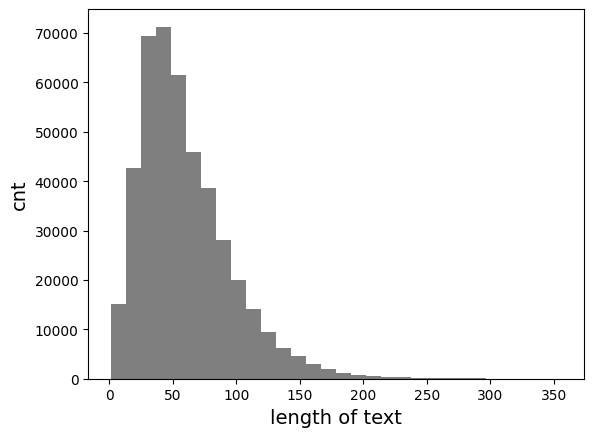

In [ ]:
# plot histogram of text length
plt.hist(df["length"],bins=30,alpha=0.5,color="k")
plt.xlabel("length of text",size=14)
plt.ylabel("cnt",size=14)

In [ ]:
!pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.9/844.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.5 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
  Attempting uninstall: blis━━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: blis 1.0.2━ 0/3 [numpy]
    Uninstalling blis-1.0.2:━━━━━━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled blis-1.0.2━━━ 0/3 [numpy]
  Attempting uninstall: thinc━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: thinc 9.1.1 0/3 [numpy]
    Uninstalling thinc-9.1.1:━━━━━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled thinc-9.1.1━━ 0/3 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [thinc]32m2/3 [thinc]
ERROR: pip's dependency resolver does not currently take into account all 

In [ ]:
!pip install ja-ginza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 9.1 MB/s eta 0:00:0000:0100:01


In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'C') 

In [ ]:
def get_list_nouns_etc(text_0,word2cnt, out_list):
    '''
    Description:文に対して形態素解析をかけ名詞と動詞と形容詞だけにする
    入力：文, word2cnt(wrould be updated), out_list(would be updated)
    出力：none
    '''
    # Analyze first text
    text = nlp(text_0)
    
    tmp_list = []
    for token in text:
        #print(str(token) + " : " + str(token.tag_))
        v1 = str(token.tag_).split("-")
        pos = v1[0]
        pos_2 = ""
        if len(v1) > 1:
            pos_2 = v1[1]
        if  pos == "名詞" or (pos == "動詞" and pos_2 == "一般") or pos == "形容詞":
            tmp_list.append(str(token))
            if str(token) in word2cnt:
                word2cnt[str(token)] += 1
            else:
                word2cnt.update({str(token) : 1})
    out_list.append(tmp_list)

In [ ]:
%%time
if skip != 1:
    # Wall time: 1h 47min 37s
    word2cnt = dict()
    out_list = []
    for i in range(len(df_now)):
        if i % 1000 == 0:
            print(i)
        text = df_now["text"].iloc[i]
        get_list_nouns_etc(text,word2cnt, out_list)

    df_word2cnt = pd.DataFrame(word2cnt.items())
    df_word2cnt.columns = ["word","cnt"]
    df_word2cnt.to_csv("SuperD_Class5_keiki_now_word2cnt.csv",index=False)

    with open('SuperD_Class5_keiki_now_out_list.pkl','wb') as f:
        pickle.dump(out_list,f)

NameError: name 'skip' is not defined